In [1]:
import numpy as np
import pandas as pd
import kagglehub
import datetime as dt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Load Data

In [2]:
df = pd.read_csv('Donations_accepted_by_political_parties.csv', dtype={
    'index': 'int64',
    'ECRef' : 'string',
    'RegulatedEntityName': 'category',
    'RegulatedEntityType': 'category',
    'Value': 'string',
    "AcceptedDate": 'string',
    "AccountingUnitName": 'category',
    "DonorName": 'category',
    "AccountingUnitsAsCentralParty": 'bool',
    'IsSponsorship': 'bool',
    'DonorStatus': 'category',
    'RegulatedDoneeType': 'category',
    'CompanyRegistrationNumber': 'string',
    'Postcode': 'string',
    'DonationType': 'category',
    'NatureOfDonation': 'category',
    'PurposeOfVisit': 'string',
    'DonationAction': 'category',
    'ReceivedDate': 'string',
    'ReportedDate': 'string',
    'IsReportedPrePoll': 'string',
    'ReportingPeriodName': 'string',
    'IsBequest': 'bool',
    'IsAggregation': 'bool',
    'RegulatedEntityId': 'category',
    'AccountingUnitId': 'category',
    'DonorId': 'category',
    'CampaigningName': 'category',
    'RegisterName': 'string',
    'IsIrishSource': 'category'
    })

Correct Datatypes

In [3]:
df['Value'] = df['Value'].replace({'\£': '', ',': ''}, regex=True).astype(float)
df['ReceivedDate'] = pd.to_datetime(df['ReceivedDate'], format='%d/%m/%Y')
df['ReportedDate'] = pd.to_datetime(df['ReportedDate'], format='%d/%m/%Y')
df['AcceptedDate'] = pd.to_datetime(df['AcceptedDate'], format='%d/%m/%Y')

Review Data to identify Unnecessary Columns and Potential improved Index

In [4]:
summary_df = pd.DataFrame({
    'DataType': df.dtypes,
    'UniqueValues': df.nunique()
}).reset_index().rename(columns={'index': 'Column'})
print(summary_df)

                           Column        DataType  UniqueValues
0                           index           int64         65278
1                           ECRef          string         65278
2             RegulatedEntityName        category          1384
3             RegulatedEntityType        category             4
4                           Value         float64         11253
5                    AcceptedDate  datetime64[ns]          6265
6              AccountingUnitName        category          1856
7                       DonorName        category         19010
8   AccountingUnitsAsCentralParty            bool             2
9                   IsSponsorship            bool             2
10                    DonorStatus        category            13
11             RegulatedDoneeType        category            13
12      CompanyRegistrationNumber          string          3558
13                       Postcode          string          4559
14                   DonationType       

Change index to ECRef as evidently a unique identifier

In [5]:
df.set_index('ECRef')
df.describe()

,index,Value
count,65278.000000,6.527800e+04
mean,32638.500000,1.672815e+04
std,18844.279773,8.377591e+04
min,0.000000,0.000000e+00
25%,16319.250000,1.530000e+03
50%,32638.500000,3.000000e+03
75%,48957.750000,9.000000e+03
max,65277.000000,5.000000e+06


Review DonorStatus, DonationAction, DonationType, NatureOfDonation

In [6]:
df.groupby('DonorStatus').agg('count')

,index,ECRef,RegulatedEntityName,RegulatedEntityType,Value,AcceptedDate,AccountingUnitName,DonorName,AccountingUnitsAsCentralParty,IsSponsorship,...,IsReportedPrePoll,ReportingPeriodName,IsBequest,IsAggregation,RegulatedEntityId,AccountingUnitId,DonorId,CampaigningName,RegisterName,IsIrishSource
DonorStatus,,,,,,,,,,,,,,,,,,,,,
Building Society,3,3,3,3,3,3,0,3,3,3,...,2,3,3,3,3,0,3,0,3,3
Company,11883,11883,11883,11883,11883,11712,9756,11883,11883,11883,...,8567,11883,11883,11883,11883,5272,11883,2,11558,11883
Friendly Society,659,659,659,659,659,659,650,659,659,659,...,573,659,659,659,659,296,659,0,659,659
Impermissible Donor,254,254,254,254,254,2,220,254,254,254,...,182,254,254,254,254,64,254,0,248,254
Individual,29434,29434,29434,29434,29434,28977,26529,29430,29434,29434,...,21688,29434,29434,29434,29434,16330,29434,3,28684,29434
Limited Liability Partnership,477,477,477,477,477,475,424,477,477,477,...,423,477,477,477,477,104,477,0,471,477
Other,1757,1757,1757,1757,1757,1754,33,1757,1757,1757,...,955,1757,1757,1757,1757,20,1757,0,1744,1757
Public Fund,1726,1726,1726,1726,1726,1720,1643,1726,1726,1726,...,972,1726,1726,1726,1726,289,1726,0,1713,1726
Registered Political Party,1029,1029,1029,1029,1029,1029,918,1029,1029,1029,...,862,1029,1029,1029,1029,774,1029,0,1022,1029


In [7]:
df.groupby('DonationAction').agg('count')

,index,ECRef,RegulatedEntityName,RegulatedEntityType,Value,AcceptedDate,AccountingUnitName,DonorName,AccountingUnitsAsCentralParty,IsSponsorship,...,IsReportedPrePoll,ReportingPeriodName,IsBequest,IsAggregation,RegulatedEntityId,AccountingUnitId,DonorId,CampaigningName,RegisterName,IsIrishSource
DonationAction,,,,,,,,,,,,,,,,,,,,,
Deferred,19,19,19,19,19,0,17,16,19,19,...,15,19,19,19,19,9,16,0,18,16
Forfeited,33,33,33,33,33,0,31,20,33,33,...,25,33,33,33,33,20,20,0,33,20
Returned,231,231,231,231,231,0,202,220,231,231,...,162,231,231,231,231,48,224,0,226,224


In [9]:
df.groupby('DonationType').agg('count')

,index,ECRef,RegulatedEntityName,RegulatedEntityType,Value,AcceptedDate,AccountingUnitName,DonorName,AccountingUnitsAsCentralParty,IsSponsorship,...,IsReportedPrePoll,ReportingPeriodName,IsBequest,IsAggregation,RegulatedEntityId,AccountingUnitId,DonorId,CampaigningName,RegisterName,IsIrishSource
DonationType,,,,,,,,,,,,,,,,,,,,,
Cash,51642,51642,51642,51642,51642,51008,47581,51642,51642,51642,...,38899,51642,51642,51642,51642,31333,51642,5,50561,51642
Exempt Trust,469,469,469,469,469,468,467,469,469,469,...,397,469,469,469,469,432,469,0,467,0
Non Cash,8308,8308,8308,8308,8308,8271,6993,8308,8308,8308,...,6554,8308,8308,8308,8308,4214,8308,0,8229,8308
Permissible Donor Exempt Trust,171,171,171,171,171,171,10,171,171,171,...,170,171,171,171,171,10,171,0,171,0
Public Funds,1713,1713,1713,1713,1713,1713,1638,1713,1713,1713,...,971,1713,1713,1713,1713,289,1713,0,1708,1713
Visit,2634,2634,2634,2634,2634,2634,18,2634,2634,2634,...,1704,2634,2634,2634,2634,0,2634,0,2634,2634
Impermissible Donor,260,260,260,260,260,0,228,256,260,260,...,186,260,260,260,260,67,260,0,254,260
Total value of donations not reported individually,58,58,58,58,58,0,0,0,58,58,...,39,58,58,58,58,0,0,0,0,0
Unidentified Donor,23,23,23,23,23,0,22,0,23,23,...,16,23,23,23,23,10,0,0,23,0


In [10]:
df.groupby('NatureOfDonation').agg('count')

,index,ECRef,RegulatedEntityName,RegulatedEntityType,Value,AcceptedDate,AccountingUnitName,DonorName,AccountingUnitsAsCentralParty,IsSponsorship,...,IsReportedPrePoll,ReportingPeriodName,IsBequest,IsAggregation,RegulatedEntityId,AccountingUnitId,DonorId,CampaigningName,RegisterName,IsIrishSource
NatureOfDonation,,,,,,,,,,,,,,,,,,,,,
Administration services,456,456,456,456,456,454,378,456,456,456,...,228,456,456,456,456,282,456,0,452,456
Advertising,1168,1168,1168,1168,1168,1158,1069,1168,1168,1168,...,1047,1168,1168,1168,1168,663,1168,0,1155,1163
Assistance for Parties (Scottish Parliament),311,311,311,311,311,311,288,311,311,311,...,234,311,311,311,311,69,311,0,311,311
Auction prizes,628,628,628,628,628,626,608,628,628,628,...,485,628,628,628,628,220,628,0,628,628
Consultancy services,377,377,377,377,377,375,292,377,377,377,...,301,377,377,377,377,116,377,0,371,377
Cranborne Money (House of Lords),162,162,162,162,162,162,140,162,162,162,...,105,162,162,162,162,34,162,0,162,162
Financial Assistance for Parties in NI Assembly,259,259,259,259,259,259,259,259,259,259,...,0,259,259,259,259,12,259,0,259,259
Hospitality,184,184,184,184,184,184,133,184,184,184,...,139,184,184,184,184,59,184,0,184,184
Loan conversion,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,7,39,0,39,39


Remove the 
"Impermissible Donor" DonorStatus
"Forfeited" and "Returned" DonationActions.
"Impermissible Donor" DonationType

Copy removed records to "ExcludedData" dataframe, then create CleanedData Dataframe excluding the identified records

In [8]:
#Excludeddata = df[(df['DonorStatus']=="Impermissible Donor") | (df['DonationActions']==('Forfeited', 'Returned')) | (df[Donationtype]=='Impermissible Donor')]

Excludeddata = df[(df['DonorStatus']=="Impermissible Donor") | (df['DonationAction']==('Forfeited' , 'Returned'))| (df['DonationType']=='Impermissible Donor')]
Excludeddata

,index,ECRef,RegulatedEntityName,RegulatedEntityType,Value,AcceptedDate,AccountingUnitName,DonorName,AccountingUnitsAsCentralParty,IsSponsorship,...,IsReportedPrePoll,ReportingPeriodName,IsBequest,IsAggregation,RegulatedEntityId,AccountingUnitId,DonorId,CampaigningName,RegisterName,IsIrishSource
13588,13588,V0221129,Sharon Hodgson MP,Regulated Donee,3400.0,2015-09-18,NaN,Taipei Representative Office in the UK,False,False,...,<NA>,October 2015,False,False,1463,NaN,72314.0,NaN,Great Britain,False
20338,20338,C0196962,Mr Mark Pritchard MP,Regulated Donee,1000.0,2014-07-09,NaN,Mr Frank Kaszynski,False,False,...,<NA>,April 2015,False,False,1514,NaN,68122.0,NaN,Great Britain,False
64274,64274,I0033960,Liberal Democrats,Political Party,6380.0,NaT,Central Party,Miss R E Finey,False,False,...,False,Q3 2005,False,False,90,NaN,33490.0,NaN,Great Britain,False
64275,64275,I0052775,Liberal Democrats,Political Party,1000.0,NaT,Central Party,NaN,False,False,...,False,Q3 2011,False,False,90,NaN,37474.0,NaN,Great Britain,False
64276,64276,I0034040,Conservative and Unionist Party,Political Party,500.0,NaT,Central Party,Mr Matthew Peck,False,False,...,False,Q4 2009,False,False,52,NaN,33570.0,NaN,Great Britain,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65262,65262,I0144765,Conservative and Unionist Party,Political Party,1000.0,NaT,Bristol North West,Mr John K Lewis,False,False,...,False,Q4 2014,False,False,52,1009.0,54037.0,NaN,Great Britain,False
65263,65263,I0034037,UK Independence Party (UKIP),Political Party,1000.0,NaT,Central Party,Mr John Haynes,False,False,...,False,Q4 2009,False,False,85,NaN,33567.0,NaN,Great Britain,False
65269,65269,I0033983,Conservative and Unionist Party,Political Party,5900.0,NaT,Witney,Mr Roger Fletcher,False,False,...,False,Q4 2007,False,False,52,1724.0,33513.0,NaN,Great Britain,False
65270,65270,I0088673,Liberal Democrats,Political Party,1000.0,NaT,Winchester District,St Cross Consulting Limited,False,False,...,False,Q1 2013,False,False,90,2390.0,45945.0,NaN,Great Britain,False


In [9]:
df = df[~df.index.isin(Excludeddata.index)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65016 entries, 0 to 65277
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          65016 non-null  int64         
 1   ECRef                          65016 non-null  string        
 2   RegulatedEntityName            65016 non-null  category      
 3   RegulatedEntityType            65016 non-null  category      
 4   Value                          65016 non-null  float64       
 5   AcceptedDate                   64263 non-null  datetime64[ns]
 6   AccountingUnitName             56729 non-null  category      
 7   DonorName                      64935 non-null  category      
 8   AccountingUnitsAsCentralParty  65016 non-null  bool          
 9   IsSponsorship                  65016 non-null  bool          
 10  DonorStatus                    64958 non-null  category      
 11  RegulatedDoneeT

In [10]:
df.groupby('DonationType').Value.agg(['min', 'max', 'sum', 'count', 'mean', 'median'])

,min,max,sum,count,mean,median
DonationType,,,,,,
Cash,0.00,5000000.00,8.411867e+08,51641,16289.124448,3000.000
Exempt Trust,350.00,330272.00,3.521248e+06,469,7507.992154,2500.000
Non Cash,10.96,1952374.76,7.373360e+07,8308,8875.012406,2678.505
Permissible Donor Exempt Trust,593.00,63000.00,1.334526e+06,171,7804.245673,2000.000
Public Funds,250.00,3685124.97,1.616066e+08,1713,94341.245470,13163.100
Visit,0.00,47252.72,9.101012e+06,2633,3456.517942,2851.000
Impermissible Donor,NaN,NaN,0.000000e+00,0,NaN,NaN
Total value of donations not reported individually,0.00,49085.00,6.425717e+05,58,11078.821897,6958.900
Unidentified Donor,300.00,10000.00,4.945000e+04,23,2150.000000,1000.000


Going to try to create a ML model that predicts the size of a donation based on the donor, donee, 

Step one is to create a grouping based on the Value donated.

In [11]:
maxvalue = df.Value.max()
print(maxvalue)

5000000.0


In [12]:
valueCategory = [0, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 7500, 10000, 25000, 50000, 75000, 100000, 250000, 500000, 750000, 1000000, 2000000]

maxvalue = df.Value.max()

def categorize(total):
    if np.isnan(total):
        return None
    else: 
        for VC in valueCategory:        
            if total <= VC:
                return VC
            else:
                pass
        return maxvalue

df['Value_Category'] = df.Value.apply(categorize)

In [13]:
value_summary_df = df.groupby(['Value_Category']).agg({'Value': ['sum', 'count']})
value_summary_df

Value       
                         sum  count
Value_Category                     
0.0             0.000000e+00      6
1000.0          5.699597e+06   8481
1500.0          9.236921e+06   7111
2000.0          1.901082e+07  10191
2500.0          1.059725e+07   4480
3000.0          1.069853e+07   3706
4000.0          1.254090e+07   3459
5000.0          2.627196e+07   5402
7500.0          2.495133e+07   4075
10000.0         5.509310e+07   5866
25000.0         1.085676e+08   6313
50000.0         1.189106e+08   2869
75000.0         4.808200e+07    785
100000.0        6.204243e+07    657
250000.0        1.523126e+08    898
500000.0        1.704321e+08    477
750000.0        5.795796e+07     93
1000000.0       5.258238e+07     58
2000000.0       1.048143e+08     75
5000000.0       4.137328e+07     14

In [14]:
ElectionDates = ['2001/06/07 00:00:00','2005/05/05 00:00:00','2010/06/05 00:00:00', '2015/07/05 00:00:00', '2017/07/05 00:00:00', '2019/12/12 00:00:00', '2024/07/04 00:00:00']

def GenElectionRelation(R_Date):
    for ED in ElectionDates:
        R_Date2 = R_Date
        #R_Date2 = dt.datetime.strptime(R_Date, '%Y/%m/%d %H:%M:%S')
        ED2 = dt.datetime.strptime(ED, '%Y/%m/%d %H:%M:%S')
        if R_Date2 <= ED2:
            DaysDiff  = (ED2 - R_Date2)
            delta = DaysDiff.days
            return delta
        else:
            pass
    return 0

df['DaysToNextElection'] = df.ReceivedDate.apply(GenElectionRelation)


In [15]:
Limited_Columns_df=df[['RegulatedEntityType','Value','Value_Category','ReceivedDate','DaysToNextElection']]
Limited_Columns_df

,RegulatedEntityType,Value,Value_Category,ReceivedDate,DaysToNextElection
0,Regulated Donee,1876.56,2000.0,2019-09-02,101
1,Regulated Donee,2700.00,3000.0,2019-09-02,101
2,Regulated Donee,4852.58,5000.0,2019-08-30,104
3,Regulated Donee,2500.00,2500.0,2019-08-30,104
4,Regulated Donee,4524.05,5000.0,2019-08-29,105
...,...,...,...,...,...
65273,Permitted Participant,10000.00,10000.0,2016-04-04,457
65274,Permitted Participant,100000.00,100000.0,2016-02-08,513
65275,Permitted Participant,40000.00,50000.0,2016-06-17,383
65276,Political Party,50000.00,50000.0,2017-05-25,41


<AxesSubplot:xlabel='Value', ylabel='DaysToNextElection'>

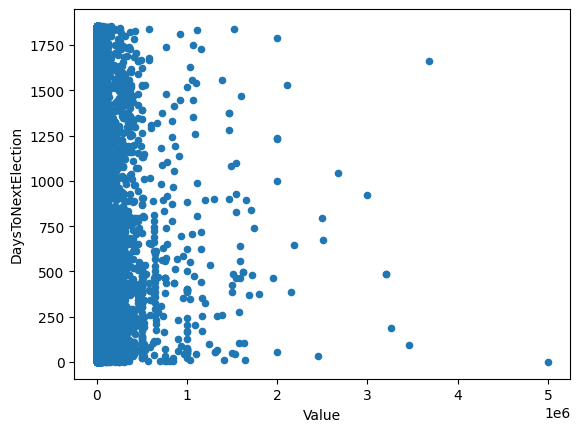

In [25]:
df.plot(kind = 'scatter', x = 'Value', y = 'DaysToNextElection')


Column list
""".drop(
'ECRef', 
#'RegulatedEntityName',
'RegulatedEntityType',
#'Value',
'AcceptedDate',
'AccountingUnitName',
'DonorName',
'AccountingUnitsAsCentralParty',
'IsSponsorship',
'DonorStatus',
'RegulatedDoneeType',
'CompanyRegistrationNumber',
'Postcode',
'DonationType',
'NatureOfDonation',
'PurposeOfVisit',
'DonationAction',
#'ReceivedDate',
'ReportedDate',
'IsReportedPrePoll',
'ReportingPeriodName',
'IsBequest',
'IsAggregation',
'RegulatedEntityId',
'AccountingUnitId',
'DonorId',
'CampaigningName',
'RegisterName',
'IsIrishSource'
)
"""

<AxesSubplot:ylabel='Frequency'>

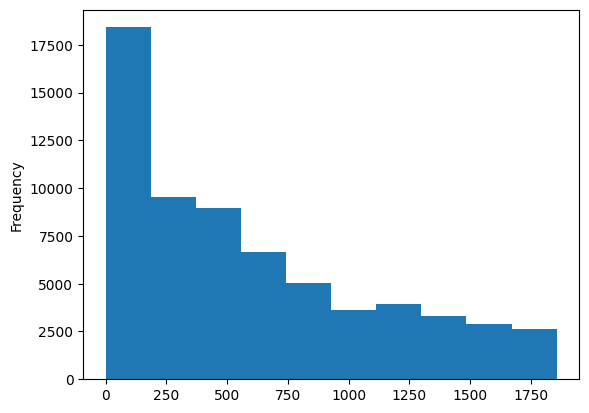

In [29]:
df["DaysToNextElection"].plot(kind = 'hist')

KeyError: 'ReceivedDate'

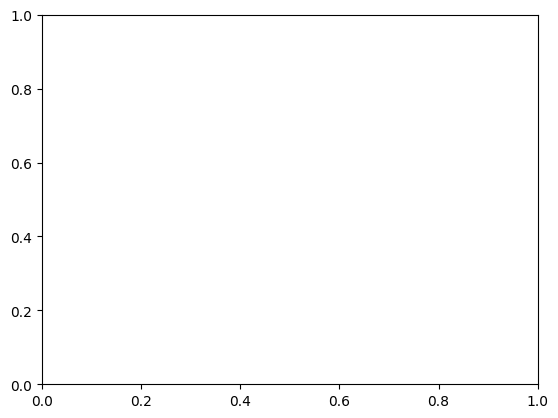

In [62]:
PlotData = df[(df['RegulatedEntityType'] =="Political Party") & (df["RegulatedEntityName"].str.contains('De-registered')==False)]
PlotData2 = PlotData[['ReceivedDate','RegulatedEntityName','Value']]
#PlotData2.pivot(index='ReceivedDate', columns='RegulatedEntityName', values='Value')
table = pd.pivot_table(PlotData2, values='Value', index=['ReceivedDate'],columns=['RegulatedEntityName'], aggfunc="sum")
table[table.columns[(table != 0).any()]]
#table.plot()
table.plot(kind = 'scatter', x = 'ReceivedDate', y = 'Value')